In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'S:\\lab_winter\\martin\\MJ-19-1\\plots\\' # directory for output plots

In [2]:
####################################
#### load in all the gene lists ####
####################################

### edited 14.8.2019 to update to newest SE gene lists (taken from pause-initiation notebook)

SE_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\SE_464_genes.xlsx')
TF_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\TF_53_genes.xlsx')
CRC_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\autoregulatory_6motifs_24_genes.xlsx')

In [3]:
######################################
#### grep genes from DEseq tables ####
######################################
# DEseq2 dataframe
DEseq_TT_1h_df = pd.read_csv('S:\\lab_winter\\martin\\MJ-19-1\\20190418_JaegerWinter2019TTseqKBM7\\DifferentialExpression\\differential.expression.estimates_1h.txt', sep="\t")

##### grep CRC genes #####
# use query to parse geneIDs from the DEseq result table. Need to use the '|'.join construct to use geneIDs as REGEX, where some TRxxx annotations have more than on gene_id
CRC_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)]

##### same for 51 TF SE-genes #####
TF_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)]

##### same for 423 SE genes; unfortunately we lose one gene (not contained in the TT-seq annotation) #####
SE_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)]


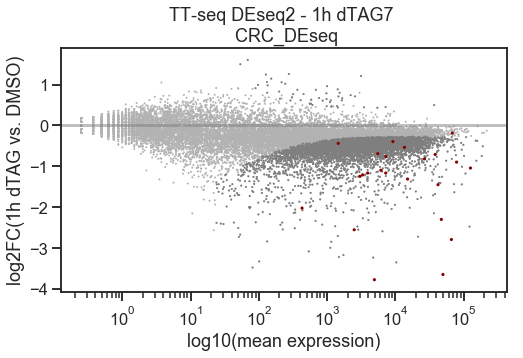

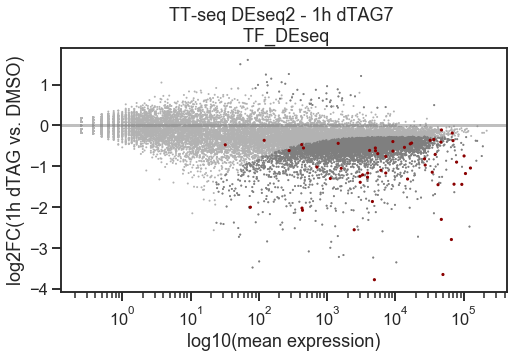

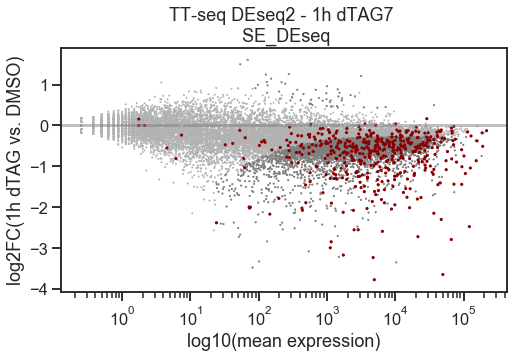

In [16]:
####################################
#### plot all sets individually ####
####################################
all_sets = [CRC_DEseq, TF_DEseq, SE_DEseq]
all_set_names = ["CRC_DEseq", "TF_DEseq", "SE_DEseq"]

counter = 0
for geneset in all_sets:
    # make the plots
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(8,4.5))

    # for plotting kernel density colormap
    #xy = np.vstack([DEseq_TT_1h_df.baseMean,DEseq_TT_1h_df.log2FoldChange])
    #z = sc.stats.gaussian_kde(xy)(xy)

    # plotting all individual
    plt.scatter(x=DEseq_TT_1h_df.baseMean, y=DEseq_TT_1h_df.log2FoldChange, s=4, c="#b2b2b2", edgecolors="none")
    plt.scatter(x=DEseq_TT_1h_df.baseMean[DEseq_TT_1h_df.padj < 0.01], y=DEseq_TT_1h_df.log2FoldChange[DEseq_TT_1h_df.padj < 0.01], s=4, c="#7f7f7f", edgecolors="none")
    plt.scatter(x=geneset.baseMean, y=geneset.log2FoldChange, s=10, c="darkred", edgecolors="none")
    plt.axhline(color="grey",alpha=0.5, linewidth=3)

    # formatting
    plt.xscale('log')
    plt.title('TT-seq DEseq2 - 1h dTAG7 \n {0}'.format(all_set_names[counter]))
    plt.xlabel('log10(mean expression)')
    plt.ylabel('log2FC(1h dTAG vs. DMSO)')

    # save
    #plt.savefig(plots_dir + 'TT-seq_1h_DE_scatter\\{0}_1h_scatterplot.pdf'.format(all_set_names[counter]), dpi=300)
    #plt.savefig(plots_dir + 'TT-seq_1h_DE_scatter\\{0}_1h_scatterplot.png'.format(all_set_names[counter]), dpi=300)
    counter += 1
    plt.show()

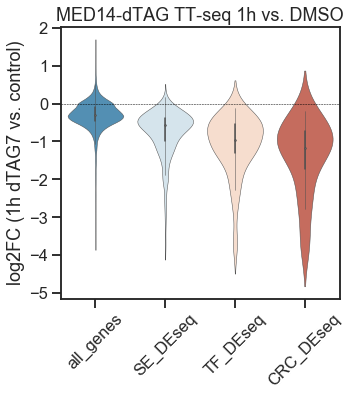

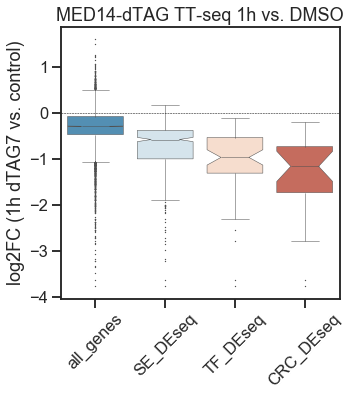

CRC vs. all_genes MannwhitneyuResult(statistic=38452.5, pvalue=2.943999973013903e-12)


SE_TF vs. all_genes MannwhitneyuResult(statistic=133546.5, pvalue=4.478720335565219e-21)


MannwhitneyuResult(statistic=2041746.0, pvalue=2.9496887521004343e-84)


In [23]:
##########################
#### make violinplots ####
##########################
# make a wide-form df with log2FoldChanges
l2fc = pd.DataFrame()
l2fc['all_genes'] = DEseq_TT_1h_df.loc[:,'log2FoldChange']

all_sets = [CRC_DEseq, TF_DEseq, SE_DEseq]
all_set_names = ["CRC_DEseq", "TF_DEseq", "SE_DEseq"]

counter = 0
for x in all_sets:
    l2fc[all_set_names[counter]] = x.log2FoldChange
    counter += 1

##### make the violinplot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(5,5))

reordered = ["all_genes", "SE_DEseq","TF_DEseq", "CRC_DEseq"]

sns.violinplot(data=l2fc.reindex(reordered, axis=1), linewidth=0.5, scale="width", palette="RdBu_r")
plt.axhline(y=0, linestyle='dashed', linewidth=0.5, color="black")
plt.title('MED14-dTAG TT-seq 1h vs. DMSO')
plt.xticks(rotation=45)
plt.ylabel('log2FC (1h dTAG7 vs. control)')

#plt.savefig(plots_dir + 'TT-seq_1h_DE_violin\\all_sets_1h_DE_violinplot.pdf', dpi=300)
#plt.savefig(plots_dir + 'TT-seq_1h_DE_violin\\all_sets_1h_DE_violinplot.png', dpi=300)
plt.show()

##### make the boxplot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(5,5))

reordered = ["all_genes", "SE_DEseq","TF_DEseq", "CRC_DEseq"]

sns.boxplot(data=l2fc.reindex(reordered, axis=1), fliersize=.5, linewidth=0.5, notch=True, palette="RdBu_r")
plt.axhline(y=0, linestyle='dashed', linewidth=0.5, color="black")
plt.title('MED14-dTAG TT-seq 1h vs. DMSO')
plt.xticks(rotation=45)
plt.ylabel('log2FC (1h dTAG7 vs. control)')

#plt.savefig(plots_dir + 'TT-seq_1h_DE_violin\\all_sets_1h_DE_violinplot.pdf', dpi=300)
#plt.savefig(plots_dir + 'TT-seq_1h_DE_violin\\all_sets_1h_DE_violinplot.png', dpi=300)
plt.show()

# testing significance that distributions differ with Mann-Whitney-U
print "CRC vs. all_genes", sc.stats.mannwhitneyu(l2fc.CRC_DEseq.dropna(), l2fc.all_genes.dropna())
print "\n"
print "SE_TF vs. all_genes", sc.stats.mannwhitneyu(l2fc.TF_DEseq.dropna(), l2fc.all_genes.dropna())
print "\n"
print sc.stats.mannwhitneyu(l2fc.SE_DEseq.dropna(), l2fc.all_genes.dropna())

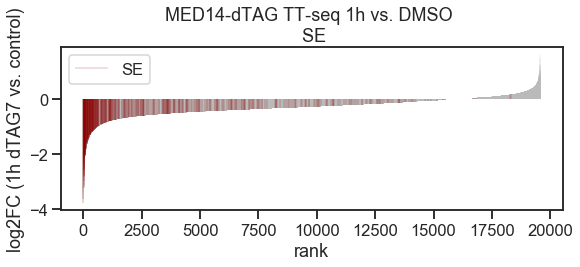

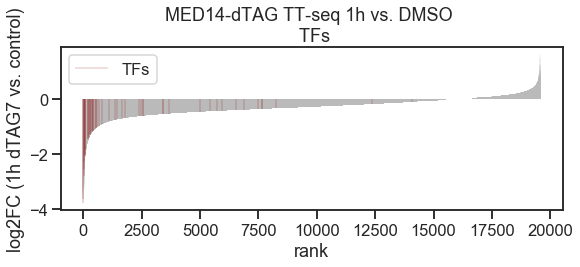

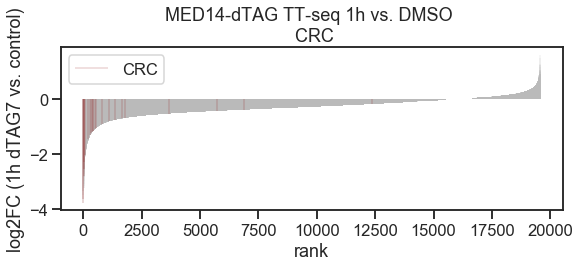

In [26]:
########################
#### make waterfall ####
########################
# significantly downregulated
#ascending = DEseq_TT_1h_df[(DEseq_TT_1h_df.padj < 0.001) & (DEseq_TT_1h_df.log2FoldChange < -0.5)].sort_values(by='log2FoldChange')
# all genes
ascending = DEseq_TT_1h_df.sort_values(by='log2FoldChange')
# add rank column
ascending['rank'] = np.arange(len(ascending.index))

# proxies for grepping the gene sets
SE_asc = ascending.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)
TFs_asc = (ascending.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)) & (ascending.index != 'TR23076')
CRC_asc = (ascending.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)) & (ascending.index != 'TR23076')

all_sets = [SE_asc, TFs_asc, CRC_asc]
all_set_names = ["SE", "TFs", "CRC"]

##### make the plots individually
counter = 0
for geneset in all_sets:
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(9,3))

    plt.vlines(x=ascending['rank'], ymin=0, ymax=ascending['log2FoldChange'], linewidth=.25, color='#bababa')
    plt.vlines(x=ascending[geneset]['rank'], ymin=0, ymax=ascending[geneset]['log2FoldChange'], linewidth=.25, color='darkred', label='{0}'.format(all_set_names[counter]))
    #plt.vlines(x=ascending[TF_ascending]['rank'], ymin=0, ymax=ascending[TF_ascending]['log2FoldChange'], linewidth=.25, color='#6c00cc', label='TF_genes')
    #plt.vlines(x=ascending[CRC_ascending]['rank'], ymin=0, ymax=ascending[CRC_ascending]['log2FoldChange'], linewidth=.25, color='black', label='CRC_genes')

    plt.xlabel('rank')
    plt.ylabel('log2FC (1h dTAG7 vs. control)')
    plt.title('MED14-dTAG TT-seq 1h vs. DMSO \n {0}'.format(all_set_names[counter]))
    plt.legend(loc=2)


    #plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\{0}_1h_waterfall_all.pdf'.format(all_set_names[counter]), dpi=300)
    #plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\{0}_1h_waterfall_all.png'.format(all_set_names[counter]), dpi=300)
    plt.show()
    counter += 1
    

In [100]:
"""
##### underlying code for manual plotting:
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(10,5))

plt.vlines(x=ascending['rank'], ymin=0, ymax=ascending['log2FoldChange'], linewidth=.25, color='#bababa')
plt.vlines(x=ascending[CRC_asc]['rank'], ymin=0, ymax=ascending[CRC_asc]['log2FoldChange'], linewidth=.5, color='darkred', label='CRC_TFs')
plt.vlines(x=ascending[CRC_ctrls_genes_asc]['rank'], ymin=0, ymax=ascending[CRC_ctrls_genes_asc]['log2FoldChange'], linewidth=.5, color='black', label='control_genes')
#plt.vlines(x=ascending[CRC_ascending]['rank'], ymin=0, ymax=ascending[CRC_ascending]['log2FoldChange'], linewidth=.25, color='black', label='CRC_genes')

plt.xlabel('rank')
plt.ylabel('log2FC (1h dTAG7 vs. control)')
plt.title('MED14-dTAG TT-seq 1h vs. DMSO')
plt.legend(loc=2)

#plt.show()
plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\CRC_with_ctrl_genes_1h_waterfall_all.pdf', dpi=300)
plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\CRC_with_ctrl_genes_1h_waterfall_all.png', dpi=300)
"""
print ""

In [160]:
"""
##############################################
#### generate CRC network cytoscape input ####
##############################################
# first the node interactions as SIF format (each node targets all other nodes):
node_sif = pd.DataFrame(CRC_genes.gene_name).rename({'gene_name': 'source_node'}, axis=1)
node_sif['interaction'] = "pp"
node_sif["target_nodes"] = '\t'.join(CRC_genes.gene_name.tolist())

#node_sif.to_csv('S:\\lab_winter\\martin\\Mediator_CRC\\networks\\CRC_22_network_node_interactions.sif', sep="\t", header=False, index=False, doublequote=False)

# now node attributes:
CRC_annotated = pd.DataFrame(columns=CRC_DEseq.columns)
for gene in CRC_genes.geneID: #["ENSG00000070476", "ENSG00000136997"]:
    row = CRC_DEseq[CRC_DEseq.gene_id.str.contains(gene)]
    row.loc[row.index, 'single_ID'] = gene
    row.loc[row.index, 'gene_name'] = CRC_genes.loc[CRC_genes.geneID.str.contains(gene), 'gene_name'].values[0]
    CRC_annotated = CRC_annotated.append(row, sort=False)
    
#CRC_annotated.to_csv('S:\\lab_winter\\martin\\Mediator_CRC\\networks\\CRC_22_network_node_attributes.txt', sep="\t")
"""

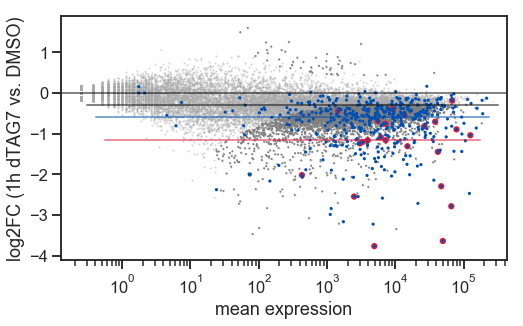

In [4]:
# make scatter plot manually
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(8,4.5))

# for plotting kernel density colormap
#xy = np.vstack([DEseq_TT_1h_df.baseMean,DEseq_TT_1h_df.log2FoldChange])
#z = sc.stats.gaussian_kde(xy)(xy)

# plotting all individual
plt.axhline(color="#0a0a0a",alpha=0.5, linewidth=2)
plt.axhline(xmin=0.06, xmax=0.98, y=DEseq_TT_1h_df.log2FoldChange.median(), color="#0b0b0b",alpha=0.5, linewidth=2)
plt.axhline(xmin=0.08, xmax=0.96, y=SE_DEseq.log2FoldChange.median(), color="#0050b3",alpha=0.5, linewidth=2)
plt.axhline(xmin=0.1, xmax=0.94, y=CRC_DEseq.log2FoldChange.median(), color="#db1d3d",alpha=0.5, linewidth=2)
plt.scatter(x=DEseq_TT_1h_df.baseMean, y=DEseq_TT_1h_df.log2FoldChange, s=4, c="#aaaaaa", alpha=0.5, vmax=0.0005, cmap="bone_r", edgecolors="black", linewidths=0)
plt.scatter(x=DEseq_TT_1h_df.baseMean[DEseq_TT_1h_df.padj < 0.01], y=DEseq_TT_1h_df.log2FoldChange[DEseq_TT_1h_df.padj < 0.01], s=4, c="#7f7f7f", edgecolors="none")
plt.scatter(x=CRC_DEseq.baseMean, y=CRC_DEseq.log2FoldChange, s=40, c="#db1d3d", edgecolors="none")
plt.scatter(x=SE_DEseq.baseMean, y=SE_DEseq.log2FoldChange, s=10, c="#0050b3", edgecolors="none")

#plt.scatter(x=DEseq_TT_1h_df[DEseq_TT_1h_df.transcript_id.str.contains('NM_012233')].baseMean, y=DEseq_TT_1h_df[DEseq_TT_1h_df.transcript_id.str.contains('NM_012233')].log2FoldChange, s=20, c="black", edgecolors="none") #rab3gap1
#plt.scatter(x=DEseq_TT_1h_df[DEseq_TT_1h_df.transcript_id.str.contains('NM_001161660')].baseMean, y=DEseq_TT_1h_df[DEseq_TT_1h_df.transcript_id.str.contains('NM_001161660')].log2FoldChange, s=20, c="black", edgecolors="none") #myb
#plt.axhline(color="grey",alpha=0.5, linewidth=2)
#plt.axhline(y=DEseq_TT_1h_df.log2FoldChange.median(), color="#666f96",alpha=0.5, linewidth=2)

# formatting
plt.xscale('log')
plt.xlabel('mean expression')
plt.ylabel('log2FC (1h dTAG7 vs. DMSO)')

# save
#plt.savefig(plots_dir + 'TT-seq_1h_DE_scatter\\Latest_464_SEs_1h_scatterplot_with_autoreg.pdf', dpi=300)
#plt.savefig(plots_dir + 'TT-seq_1h_DE_scatter\\Latest_464_SEs_1h_scatterplot_with_autoreg.png', dpi=300)
plt.show()

In [5]:
DEseq_TT_1h_df

,chr,strand,start,end,type,source,length,id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,transcript_id
TR00001,chr1,+,11874,14409,transcribed_region,REFSEQ_merge,2536,TR00001,0.250,-1.809406e-01,0.167947,-1.077369e+00,2.813155e-01,NaN,ENSG00000223972,NR_046018
TR00004,chr1,+,817371,819834,transcribed_region,REFSEQ_merge,2464,TR00004,0.750,-1.245698e-01,0.228550,-5.450441e-01,5.857232e-01,NaN,ENSG00000177757,NR_103536
TR00005,chr1,+,827591,859446,transcribed_region,REFSEQ_merge,31856,TR00005,2317.375,-8.716611e-02,0.106632,-8.174489e-01,4.136720e-01,4.841910e-01,NA ENSG00000228794,NR_047526 NR_047525 NR_047524 NR_047523 NR_047...
TR00006,chr1,+,925741,944581,transcribed_region,REFSEQ_merge,18841,TR00006,4.625,-3.093797e-01,0.463727,-6.671594e-01,5.046704e-01,NaN,ENSG00000187634,NM_152486
TR00007,chr1,+,960587,965719,transcribed_region,REFSEQ_merge,5133,TR00007,93.000,-1.856987e-01,0.278255,-6.673692e-01,5.045364e-01,5.702569e-01,ENSG00000187961,NM_198317
TR00008,chr1,+,966497,975104,transcribed_region,REFSEQ_merge,8608,TR00008,1.250,-1.401499e-16,0.323428,-4.333262e-16,1.000000e+00,NaN,ENSG00000187583,NM_032129 NM_001160184
TR00009,chr1,+,1013467,1014539,transcribed_region,REFSEQ_merge,1073,TR00009,74.000,-2.234840e-01,0.313525,-7.128117e-01,4.759623e-01,5.429428e-01,ENSG00000187608,NM_005101
TR00010,chr1,+,1020123,1056119,transcribed_region,REFSEQ_merge,35997,TR00010,428.125,1.813637e-01,0.185163,9.794824e-01,3.273417e-01,3.990059e-01,ENSG00000188157,NM_001305275 NM_198576
TR00015,chr1,+,1173906,1197933,transcribed_region,REFSEQ_merge,24028,TR00015,1.625,-6.038511e-02,0.340565,-1.773088e-01,8.592659e-01,NaN,ENSG00000162571,NM_001130045 NM_153254
TR00016,chr1,+,1232249,1235040,transcribed_region,REFSEQ_merge,2792,TR00016,136.250,-4.950364e-01,0.270850,-1.827714e+00,6.759252e-02,1.049265e-01,ENSG00000176022,NM_080605


In [18]:
z.max()

0.00019544633513214832

In [31]:
DEseq_TT_1h_df.describe()

,start,end,length,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
count,1.955900e+04,1.955900e+04,1.955900e+04,19559.000000,19559.000000,19559.000000,19559.000000,1.955900e+04,1.369100e+04
mean,7.422620e+07,7.429225e+07,6.604704e+04,3431.298782,-0.298344,0.226941,-1.996209,2.929403e-01,1.700357e-01
std,5.514831e+07,5.515504e+07,1.252735e+05,8847.364556,0.356274,0.126891,2.348907,3.369512e-01,2.618431e-01
min,1.187400e+04,1.440900e+04,7.300000e+01,0.250000,-3.766876,0.086348,-32.225623,7.725228e-228,1.057661e-223
25%,3.181257e+07,3.188304e+07,1.024600e+04,10.250000,-0.470841,0.119058,-3.289508,9.385812e-04,3.127187e-04
50%,6.075623e+07,6.086803e+07,2.713400e+04,385.000000,-0.289681,0.174763,-1.497543,1.198924e-01,2.081419e-02
75%,1.100451e+08,1.101722e+08,6.821700e+04,3001.687500,-0.078162,0.321369,-0.300253,5.791104e-01,2.482001e-01
max,2.489062e+08,2.489191e+08,2.304636e+06,217312.500000,1.601821,0.484902,10.812809,1.000000e+00,1.000000e+00


In [24]:
DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('ENSG00000116017', na=False)]

,chr,strand,start,end,type,source,length,id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,transcript_id
TR20544,chr19,+,926037,972803,transcribed_region,REFSEQ_merge,46767,TR20544,1910.0,-0.601968,0.111571,-5.395387,6.837591e-08,6.768869e-07,ENSG00000116017,NM_005224


In [7]:
DEseq_TT_1h_df.loc["TR20159"]

chr                                                           chr18
strand                                                            +
start                                                       3411927
end                                                         3458408
type                                             transcribed_region
source                                                 REFSEQ_merge
length                                                        46482
id                                                          TR20159
baseMean                                                    710.125
log2FoldChange                                             -1.01734
lfcSE                                                      0.147676
stat                                                       -6.88895
pvalue                                                  5.62057e-12
padj                                                    1.29766e-10
gene_id                                         